#PRiR lab 13
##Daniel Matusiewicz
##nr 82655

##Zadanie
###Zaimplementuj w Google Colab w bibliotece PyTorch program z wykorzystaniem tensorów, w którym obliczysz pole okręgu na podstawie algorytmu Monte Carlo. Program powinien posiadać 2 wersje -> na CPU i GPU. Przestaw różnice w czasie obliczeń w zależności od rozmiaru problemu (liczby losowanych punktów) dla CPU i GPU w postaci wykresów oraz wniosków.

##Kod wraz z omówieniem

###Wczytanie potrzebnych bibliotek do wykonania zadania. Musimy pamiętać aby włączyć środowisko wersji GPU.

In [56]:
import torch
import matplotlib.pyplot as plt
import time as timer

###Poniżej znajduje się funkcja naszego programu z argumentami do podania, czyli liczbą losowanych punktów i sposobu obliczeń (GPU/CPU)

In [57]:
def monte_carlo(n, device):
  # Generuj losowe punkty w zakresie (-1, 1)
  x = 2 * torch.rand(n, 2, device=device) - 1

  # Oblicz odległość punktów od środka
  distance = torch.sqrt(x[:, 0] ** 2 + x[:, 1] ** 2)

  # Zlicz liczbę punktów w środku okręgu
  in_circle = (distance <= 1).sum().float()

  # Oblicz pole okręgu
  area = 4 * in_circle / n

  return area


###Tutaj ustalamy wartości n, wywołujemy nasze funkcje dla CPU oraz GPU i mierzymy czas, w jakim program upora się z funkcją.

In [63]:
n_values = [10, 100, 1000, 10000, 100000, 1000000, 10000000]
times_cpu = []
times_gpu = []

for n in n_values:
  # Obliczenia na CPU
  start = timer.time()
  area_cpu = monte_carlo(n, torch.device("cpu"))
  print("CPU - pole dla n =", n, " wynosi:", area_cpu)
  end = timer.time()
  times_cpu.append(end - start)

  # Obliczenia na GPU
  start = timer.time()
  area_gpu = monte_carlo(n, torch.device("cuda"))
  print("GPU - pole dla n =", n, " wynosi:", area_gpu)
  end = timer.time()
  times_gpu.append(end - start)

CPU - pole dla n = 10  wynosi: tensor(3.6000)
GPU - pole dla n = 10  wynosi: tensor(3.2000, device='cuda:0')
CPU - pole dla n = 100  wynosi: tensor(3.3200)
GPU - pole dla n = 100  wynosi: tensor(3.2800, device='cuda:0')
CPU - pole dla n = 1000  wynosi: tensor(3.0800)
GPU - pole dla n = 1000  wynosi: tensor(3.1680, device='cuda:0')
CPU - pole dla n = 10000  wynosi: tensor(3.1288)
GPU - pole dla n = 10000  wynosi: tensor(3.1344, device='cuda:0')
CPU - pole dla n = 100000  wynosi: tensor(3.1351)
GPU - pole dla n = 100000  wynosi: tensor(3.1352, device='cuda:0')
CPU - pole dla n = 1000000  wynosi: tensor(3.1411)
GPU - pole dla n = 1000000  wynosi: tensor(3.1400, device='cuda:0')
CPU - pole dla n = 10000000  wynosi: tensor(3.1417)
GPU - pole dla n = 10000000  wynosi: tensor(3.1416, device='cuda:0')


Ostatnim segmentem jest wyświetlenie wyników za pomocą biblioteki myplotlib.

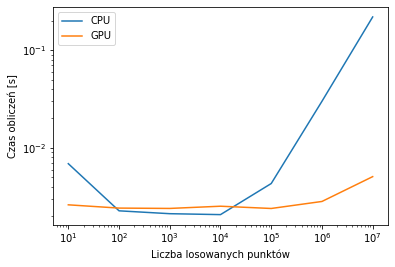

In [64]:
plt.plot(n_values, times_cpu, label='CPU')
plt.plot(n_values, times_gpu, label='GPU')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Liczba losowanych punktów')
plt.ylabel('Czas obliczeń [s]')
plt.legend()
plt.show()

##Wnioski
###Jak można zauważyc, przy małej liczbie punktów, korzystniejszą opcją jest wersja CPU. Gdy liczba n szybuje w górę, czas dla GPU praktycznie pozostaje mniej więcej w podobnym miejscu. Czas dla CPU przy wielu próbach odpalenia kodu, od n = 1000 (w większości przypadków) nieustannie się zwiększa.